<h2> DATA 219: Final Project
<h3> Ling Jin (ID: 011880184)

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [9]:
# Load the dataset containing salary information for various undergraduate majors
data = pd.read_csv('degrees-that-pay-back.csv')
data.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


# Step 1: Define the question
Question I'm trying to answer is: **Which undergraduate degree offers the highest mid-career median salary?**

This question is significant because salary data is a critical factor for students choosing a major and for policymakers analyzing the economic impacts of educational investments. Identifying degrees with the highest financial returns provides valuable information for career planning, institutional decision-making, and educational funding strategies. 

# Step 2: Data cleaning

In [13]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Clean salary fields by removing dollar signs and commas, then convert them to numeric values for analysis
for column in data.columns:
    if 'Salary' in column:
        data[column] = data[column].replace({r'\$': '', ',': ''}, regex=True).astype(float)

# Check for invalid salary values (e.g., negative)
invalid_rows = data[ (data['Mid-Career Median Salary'] < 0)]
print("Invalid Salary Rows:\n", invalid_rows)

# Drop duplicates
data = data.drop_duplicates()

# Retain only the relevant columns: the major and its mid-career median salary
cleaned_data = data[['Undergraduate Major', 'Mid-Career Median Salary']].dropna()
cleaned_data.head()

Missing Values:
 Undergraduate Major                                  0
Starting Median Salary                               0
Mid-Career Median Salary                             0
Percent change from Starting to Mid-Career Salary    0
Mid-Career 10th Percentile Salary                    0
Mid-Career 25th Percentile Salary                    0
Mid-Career 75th Percentile Salary                    0
Mid-Career 90th Percentile Salary                    0
dtype: int64
Invalid Salary Rows:
 Empty DataFrame
Columns: [Undergraduate Major, Starting Median Salary, Mid-Career Median Salary, Percent change from Starting to Mid-Career Salary, Mid-Career 10th Percentile Salary, Mid-Career 25th Percentile Salary, Mid-Career 75th Percentile Salary, Mid-Career 90th Percentile Salary]
Index: []


,Undergraduate Major,Mid-Career Median Salary
0,Accounting,77100.0
1,Aerospace Engineering,101000.0
2,Agriculture,71900.0
3,Anthropology,61500.0
4,Architecture,76800.0


# Step 3: Reason to choose Hash Table and Binary Search Tree
1) Hash table provides extremely fast insertion and retrieval operations with an average time complexity of O(1). This makes them ideal for tasks where quick lookups are required and the data does not need to be stored in any specific order. The goal of finding the maximum salary doesn't require ordered data traversal, making the hash table an efficient choice. The hash table’s direct mapping between degree names and salaries enables fast operations regardless of the dataset size, ensuring scalability for larger datasets.
2) Binary Search Tree allow for ordered storage and retrieval of data with an average time complexity of O(log n) for insertion, deletion, and search operations (when balanced). The hierarchical structure of a BST ensures that the maximum salary can be efficiently retrieved by traversing to the rightmost node. BSTs are particularly useful when data must be stored in a sorted format or when range-based queries (e.g., retrieving all degrees with salaries in a specific range) are required. 

In [16]:
# Hash Table Implementation

def hash_table_analysis(data):
    
    # Analyze data using a Hash Table and returns the degree with the highest mid-career median salary
    hash_table = {}
    
    # Iterate through each row in the data
    for _, row in data.iterrows():
        # Use the undergraduate major as the key and the mid-career median salary as the value
        hash_table[row['Undergraduate Major']] = row['Mid-Career Median Salary']
        
    # Find the maximum value in the hash table
    max_salary_major = max(hash_table, key=hash_table.get)
    return max_salary_major, hash_table[max_salary_major]

In [18]:
# Binary Search Tree Implementation

# Define a class for a Binary Search Tree to analyze the data
class TreeNode:
    def __init__(self, key, value):
        # Initialize a tree node with a degree name (key) and its salary (value)
        self.key = key
        self.value = value
        self.left = None  # Pointer to the left child
        self.right = None  # Pointer to the right child

class BinarySearchTree:
    def __init__(self):
        self.root = None  # The root of the BST starts as None
    
    # Insert a new degree and its salary into the BST
    def insert(self, key, value):
        if self.root is None:
            self.root = TreeNode(key, value)  # If the tree is empty, create the root
        else:
            self._insert(self.root, key, value)  # Recursively find the correct position
    
    def _insert(self, node, key, value):
        # Navigate to the left subtree if the value is smaller
        if value < node.value:
            if node.left is None:
                node.left = TreeNode(key, value)
            else:
                self._insert(node.left, key, value)
        # Navigate to the right subtree if the value is larger
        else:
            if node.right is None:
                node.right = TreeNode(key, value)
            else:
                self._insert(node.right, key, value)
    
    # Retrieve the degree with the highest salary by traversing to the rightmost node
    def find_max(self):
        current = self.root
        while current and current.right:
            current = current.right
        return current.key, current.value

# Define a function to analyze the data using a BST
def bst_analysis(data):

    # Analyze data using a Binary Search Tree and returns the degree with the highest mid-career median salary
    bst = BinarySearchTree()
    
    # Populate the BST with degrees and their salaries
    for _, row in data.iterrows():
        bst.insert(row['Undergraduate Major'], row['Mid-Career Median Salary'])
        
    # Find the degree with the highest salary
    return bst.find_max()

# Step 4: Performance analysis

Hash Table Result: ('Chemical Engineering', 107000.0)
BST Result: ('Chemical Engineering', 107000.0)


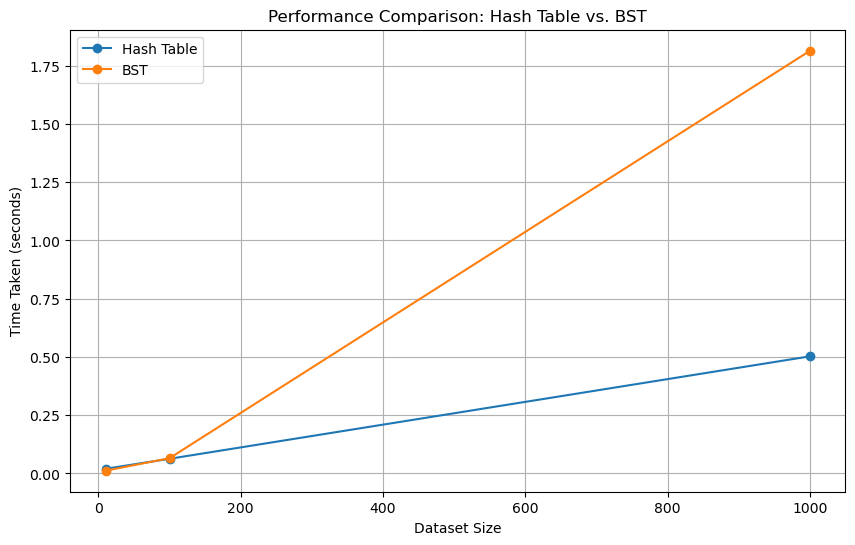

In [21]:
hash_table_result = hash_table_analysis(cleaned_data)
print("Hash Table Result:", hash_table_result)

bst_result = bst_analysis(cleaned_data)
print("BST Result:", bst_result)

# Compare the performance of the Hash Table and BST as the dataset size increased
# Create simulated datasets of sizes 10, 100, and 1000 and measuring execution time for each structure
sizes = [10, 100, 1000]  
hash_table_times = []
bst_times = []

for size in sizes:
    test_data = pd.concat([cleaned_data] * size, ignore_index=True)
    
    # Measure Hash Table Performance
    start_time = time.time()
    hash_table_analysis(test_data)
    hash_table_times.append(time.time() - start_time)

    # Measure BST Performance
    start_time = time.time()
    bst_analysis(test_data)
    bst_times.append(time.time() - start_time)

# Visualize the performance results
plt.figure(figsize=(10, 6))
plt.plot(sizes, hash_table_times, label='Hash Table', marker='o')
plt.plot(sizes, bst_times, label='BST', marker='o')
plt.title('Performance Comparison: Hash Table vs. BST')
plt.xlabel('Dataset Size')
plt.ylabel('Time Taken (seconds)')
plt.legend()
plt.grid()
plt.show()

# Step 5: Big O analysis and conclusion

##### **Analysis**: 
The graph highlights a significant difference in runtime performance between the Hash Table and BST across varying dataset sizes. The Hash Table consistently maintained rapid performance, regardless of dataset size, due to its average-case time complexity of **O(1)**. This efficiency makes it an ideal choice for tasks where ordered data or range queries are not required.

In contrast, the BST demonstrated increasing runtime as the dataset size grew. This decline in efficiency is attributed to the BST's logarithmic time complexity **O(log n)** in balanced configurations and linear time complexity O(n) in unbalanced scenarios. These results underscore the Hash Table's scalability and superior runtime efficiency for this specific task.

##### **Conclusion**: 
Both data structures successfully identified **Chemical Engineering** as the degree with the highest mid-career median salary, totaling **$107,000**. However, the Hash Table emerged as the more effective data structure in this context, demonstrating superior scalability and runtime efficiency. While the BST offers distinct advantages for tasks involving ordered data or range queries, these features were not relevant to the objectives of this analysis.